# Checking RIVM data dor corralations

In [113]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats
from scipy.stats import chisquare
import seaborn as sns

In [114]:
%run ./data/data.ipynb

Pulling data from sources.json:
(Source: CBS)  deceased @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70895ned&_theme=76
(Source: CBS)  population @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=37230ned&_theme=76
(Source: RIVM) counts_per_municipality @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427
(Source: RIVM) prevalence @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
(Source: RIVM) r @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
(Source: RIVM) homes_for_elderly @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0179dd26-7bf6-4021-857f-8623aaf8e73a
(Source: RIVM) homes_for_disabled @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/aa28b74d-7150-47bc-a7cb-98876e93381b
(Source: RIVM) seventy_plus_living_at_home @ https://data.riv

In [115]:
def corr_visual(df, method):
    matrix = df.corr(method=method)
    plt.figure(figsize=(20, 8))
    sns.heatmap(matrix, annot=True, cmap="RdYlGn", vmin=-1)

In [116]:
rivm.drop(columns=['prev_low',
                   'prev_up',
                   'Hospital_admission_NICE_notification',
                   'IC_admission_notification',
                   'Rt_low',
                   'Rt_up'], inplace=True)

In [117]:
# check for normality: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
for c in rivm.columns:
    print(c)
    stat, p = chisquare(rivm[c])
    print('stat=%.3f, p=%.3f' % (stat,p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print()

prev_avg
stat=nan, p=nan
Probably not Gaussian

Deceased_covid
stat=nan, p=nan
Probably not Gaussian

Positive_tests
stat=nan, p=nan
Probably not Gaussian

Hospital_admission
stat=nan, p=nan
Probably not Gaussian

Hospital_admission_NICE
stat=nan, p=nan
Probably not Gaussian

IC_admission
stat=nan, p=nan
Probably not Gaussian

IC_Bedden_COVID
stat=nan, p=nan
Probably not Gaussian

IC_Bedden_Non_COVID
stat=nan, p=nan
Probably not Gaussian

Kliniek_Bedden
stat=nan, p=nan
Probably not Gaussian

IC_Nieuwe_Opnames_COVID
stat=nan, p=nan
Probably not Gaussian

Kliniek_Nieuwe_Opnames_COVID
stat=nan, p=nan
Probably not Gaussian

IC_Bedden_TOTAAL
stat=nan, p=nan
Probably not Gaussian

Rt_avg
stat=nan, p=nan
Probably not Gaussian

Positive_tests_elderly_homes
stat=nan, p=nan
Probably not Gaussian

Deceased_elderly_homes
stat=nan, p=nan
Probably not Gaussian

new_infected_elderly_homes
stat=nan, p=nan
Probably not Gaussian

balance_infected_elderly_homes
stat=nan, p=nan
Probably not Gaussian



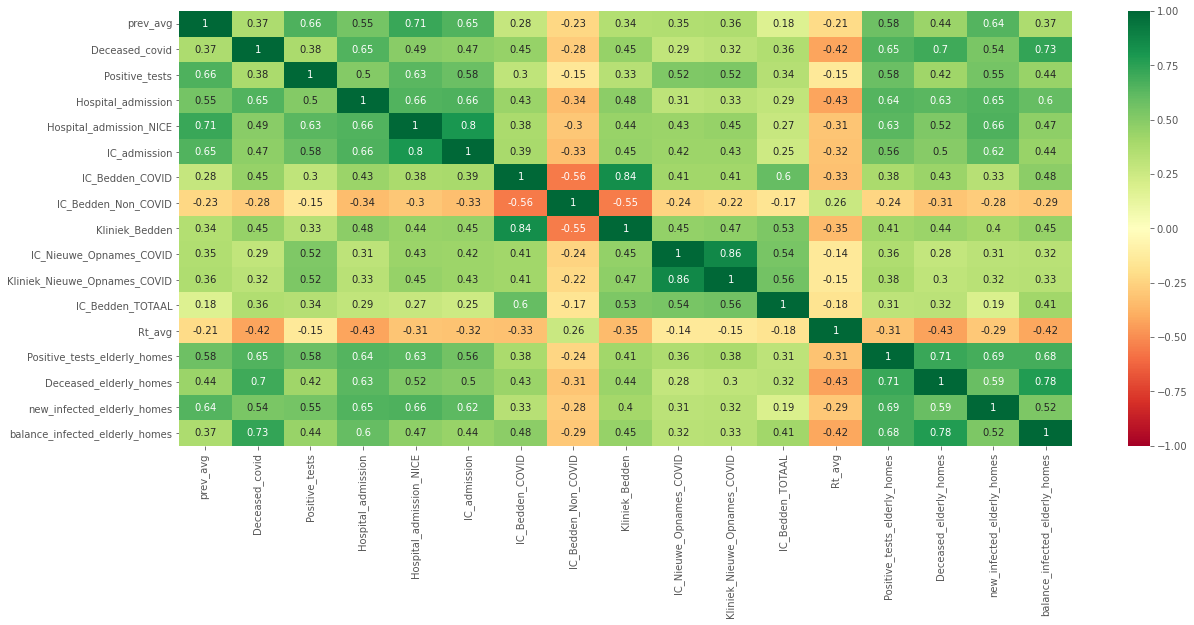

In [118]:
corr_visual(rivm, 'kendall')

## regression

In [108]:
def regress(x_label, y_label, x, y):
    slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(facecolor='white')
    plt.show()

prev_avg,Deceased_covid
Regression line: y=nan+nanx, r=nan


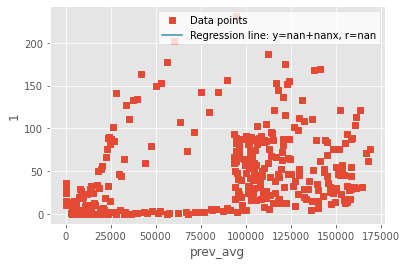

prev_avg,Positive_tests
Regression line: y=nan+nanx, r=nan


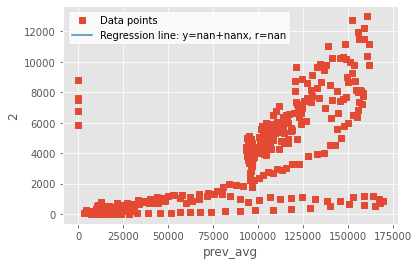

prev_avg,Hospital_admission
Regression line: y=nan+nanx, r=nan


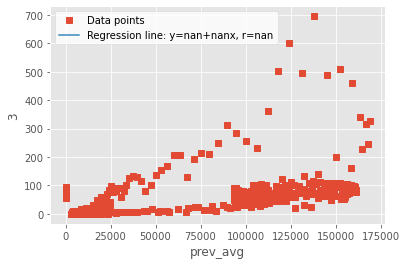

prev_avg,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


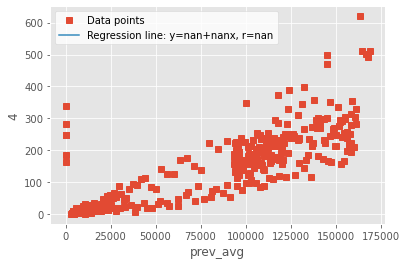

prev_avg,IC_admission
Regression line: y=nan+nanx, r=nan


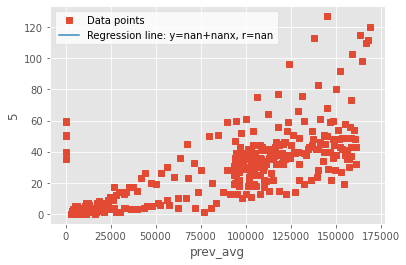

prev_avg,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


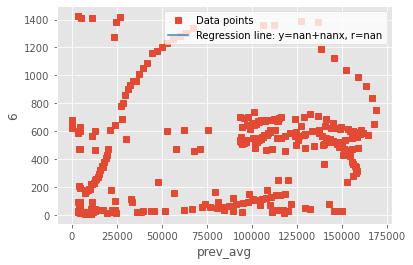

prev_avg,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


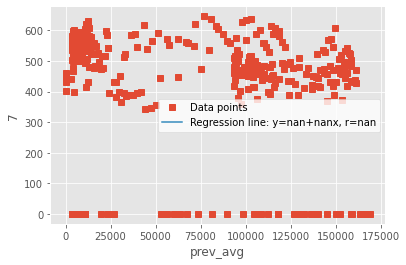

prev_avg,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


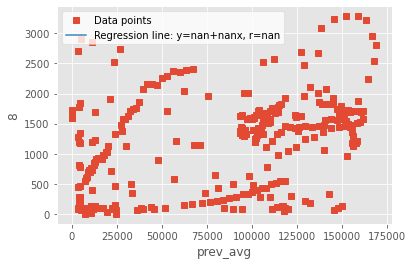

prev_avg,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


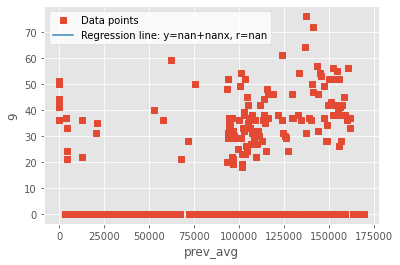

prev_avg,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


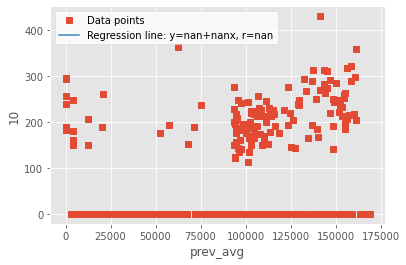

prev_avg,IC_Bedden_TOTAAL
Regression line: y=nan+nanx, r=nan


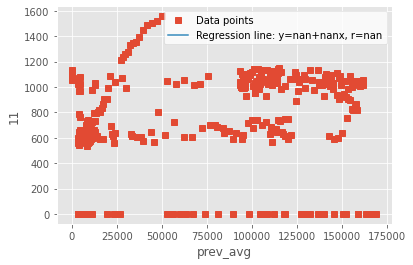

prev_avg,Rt_avg
Regression line: y=nan+nanx, r=nan


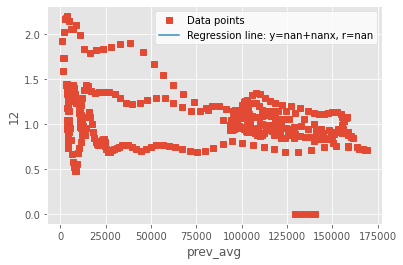

prev_avg,Positive_tests_elderly_homes
Regression line: y=nan+nanx, r=nan


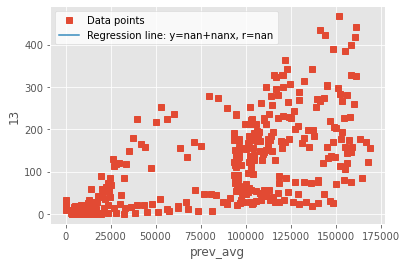

prev_avg,Deceased_elderly_homes
Regression line: y=nan+nanx, r=nan


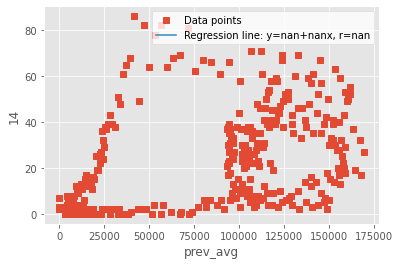

prev_avg,new_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


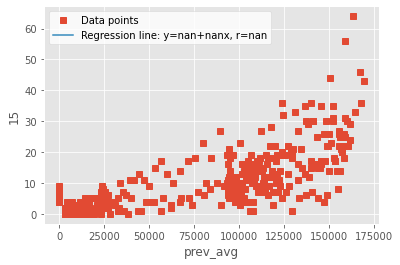

prev_avg,balance_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


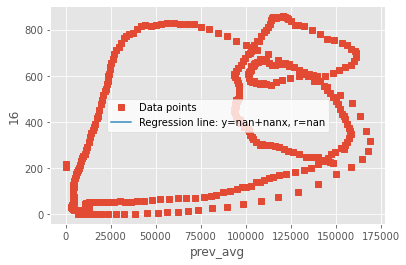

Deceased_covid,Positive_tests
Regression line: y=nan+nanx, r=nan


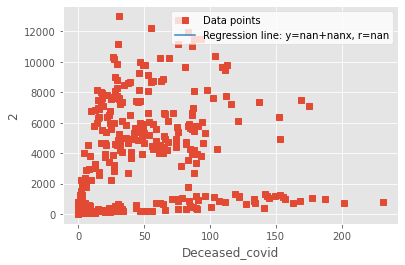

Deceased_covid,Hospital_admission
Regression line: y=nan+nanx, r=nan


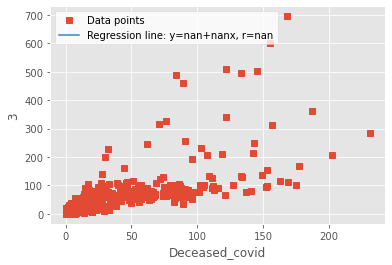

Deceased_covid,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


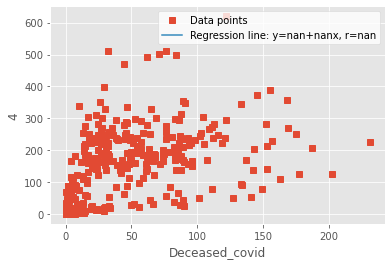

Deceased_covid,IC_admission
Regression line: y=nan+nanx, r=nan


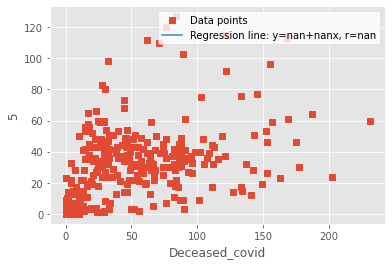

Deceased_covid,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


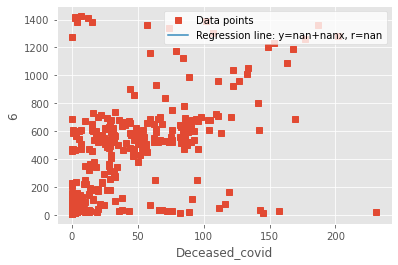

Deceased_covid,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


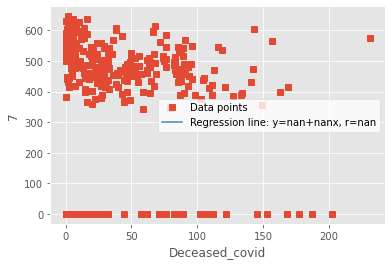

Deceased_covid,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


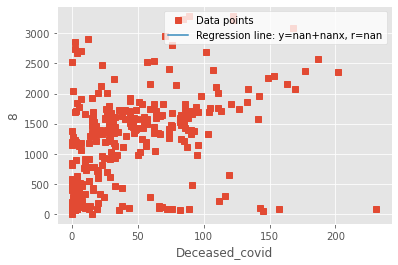

Deceased_covid,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


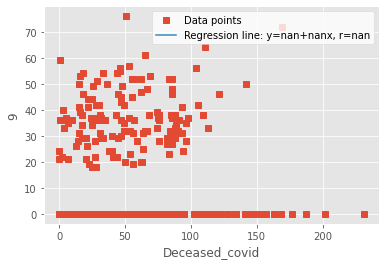

Deceased_covid,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


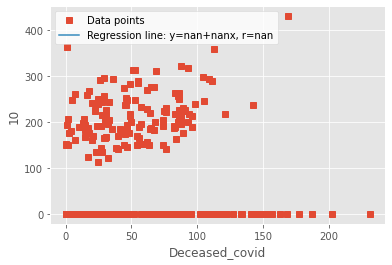

Deceased_covid,IC_Bedden_TOTAAL
Regression line: y=nan+nanx, r=nan


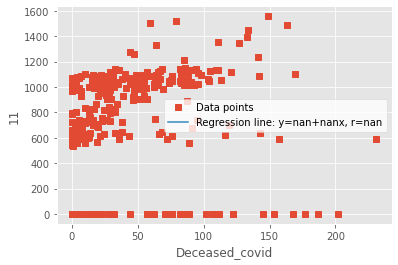

Deceased_covid,Rt_avg
Regression line: y=nan+nanx, r=nan


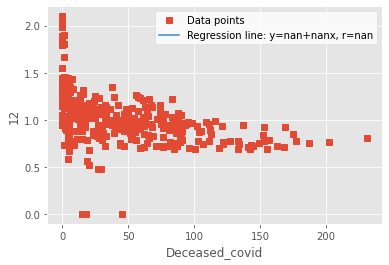

Deceased_covid,Positive_tests_elderly_homes
Regression line: y=nan+nanx, r=nan


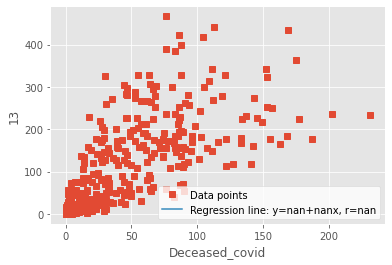

Deceased_covid,Deceased_elderly_homes
Regression line: y=nan+nanx, r=nan


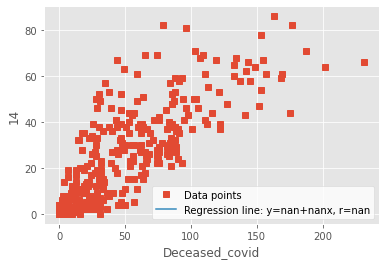

Deceased_covid,new_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


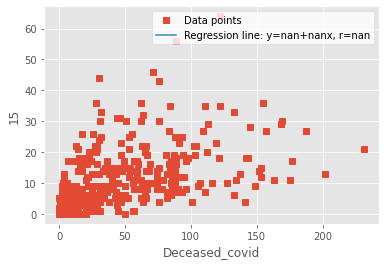

Deceased_covid,balance_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


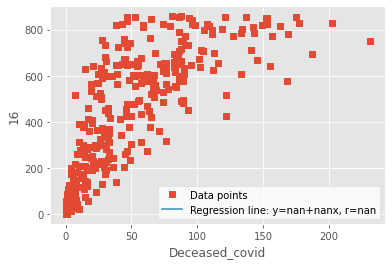

Positive_tests,Hospital_admission
Regression line: y=nan+nanx, r=nan


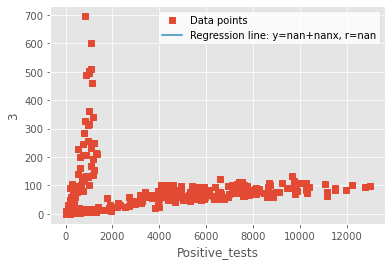

Positive_tests,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


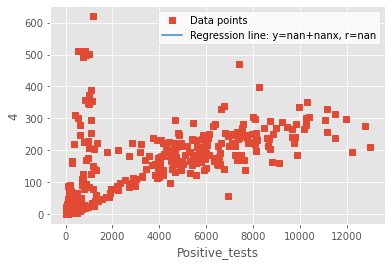

Positive_tests,IC_admission
Regression line: y=nan+nanx, r=nan


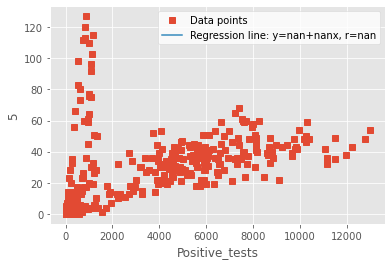

Positive_tests,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


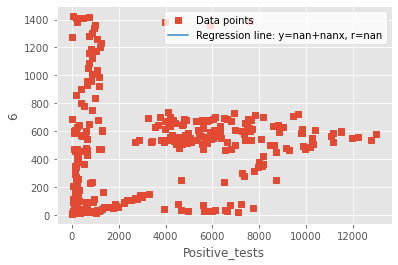

Positive_tests,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


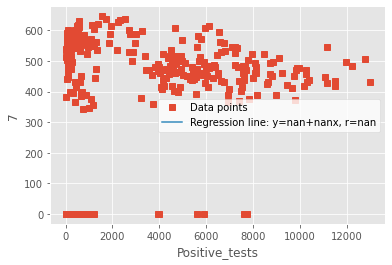

Positive_tests,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


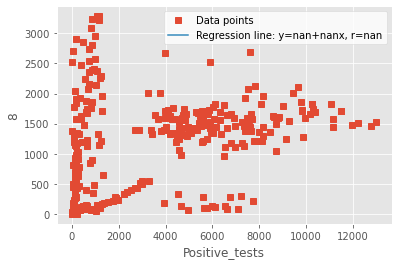

Positive_tests,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


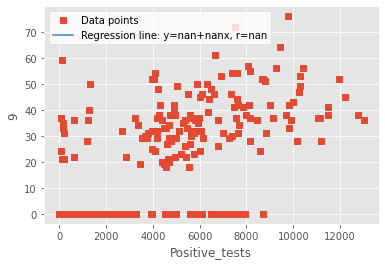

Positive_tests,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [109]:
c = 0
len_c = len(rivm.columns)
for column in rivm.columns:
    cn = 1 + c
    while cn < len_c:
        cc = rivm.columns[c]
        ccn = rivm.columns[cn]
        print(cc + ',' + ccn)
        x = rivm[cc]
        y = rivm[ccn]
        regress(cc, cn, x, y)
        cn+=1
    c+=1